# ccClub: Introduction to Machine Learning
---
## Lab 02: Basic Machine Learning with SK-Learn

## Overview

- Hyperparameter & Model Evaluation
- Classification: Support Vector Machine
- Regression: Least-Square Regression
- Clustering: K-means Clustering
- Dimensionality Reduction: Principal Components Analysis

## Installation

If you have Python2 and Python3 and want to make sure you are installing for Python3, use `pip3 install ...`. For details about installing sklearn, please visit the [documentation](http://scikit-learn.org/stable/install.html).

>```python
pip install scipy
pip install sklearn
```

If you don't have NumPy, Pandas, Matplotlib or Seaborn, install them as well.

>```python
pip install numpy
pip install pandas
pip install matplotlib
pip install seaborn
```

In [12]:
# Standard Import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()  # set seaborn as defaults

# Part 1: Hyperparameter & Model Evaluation

## Hyperparameter

For example, when using k-nearest neighbor classification, we have to set the number of neighbors before runing the model. In sklearn's `KNeighborsClassifier(n_neighbors=5)`, `n_neighbor` is the **hyperparameter** that we have to set before training the model.

![](img/hyperparameter.png)

## Cross-Validation

![](img/cross-validation.png)

In [2]:
# load iris data
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

print(X.shape, y.shape)

(150, 4) (150,)


In sklearn, `cross_val_score` from `sklearn.model_selection` will return the scores of the estimator for each run of the cross validation.

```text
step 1: initialize an estimator by calling an appropriate estimator class
step 2: do cross validation using `cross_val_score(estimator, X, y, cv=n)`
```

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)  # initialize an estimator
scores = cross_val_score(knn, X, y, cv=5)  # do cross-validation

print('cross validation accuracy:', scores)
print('average accuracy:', scores.mean())

cross validation accuracy: [ 0.96666667  1.          0.93333333  0.96666667  1.        ]
average accuracy: 0.973333333333


## Underfitting & Overfitting

![](img/underfit_overfit.png)
![](img/underfit_overfit_plot.png)

# Part 2: Classification - Support Vector Machine (SVM)

## Maximizing Margin

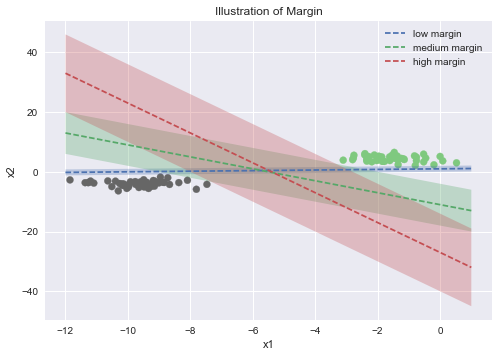

In [345]:
from sklearn.datasets import make_blobs

# generate data from sklearn
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1)

# function for plotting data points
def plot(x, y, color=None, title_name=None):
    plt.scatter(x, y, c=color, cmap='Accent')
    plt.xlabel('x1')
    plt.ylabel('x2')
    if title_name:
        plt.title(title_name)

# plot data point
plot(X[:, 0], X[:, 1], y, 'Illustration of Margin')

# plot decision boundary and margin
xline = np.linspace(-12, 1)
parameters = [(0.1, 1, 1, 'low margin'), (-2, -11, 7, 'medium margin'), (-5, -27, 13, 'high margin')]
for slope, intercept, margin, label_text in parameters:
    yline = slope * xline + intercept
    plt.plot(xline, yline, '--', label=label_text)
    plt.fill_between(xline, yline - margin, yline + margin, alpha=0.3)
    plt.legend();

## Constructing A Linear SVM

```text
Step 1: Import
Step 2: Initalize
Step 3: Fit
Step 4: Predict (or Transform)
```

### `LinearSVC`

In [346]:
from sklearn.svm import LinearSVC  # linear support vector classifier

classifier = LinearSVC()        # initialize a classifier
classifier.fit(X, y)            # fit the data
y_pred = classifier.predict(X)  # make prediction

print('coefficient:', classifier.coef_)
print('intercept:', classifier.intercept_)

coefficient: [[-0.05053164 -0.38633143]]
intercept: [-0.14540107]


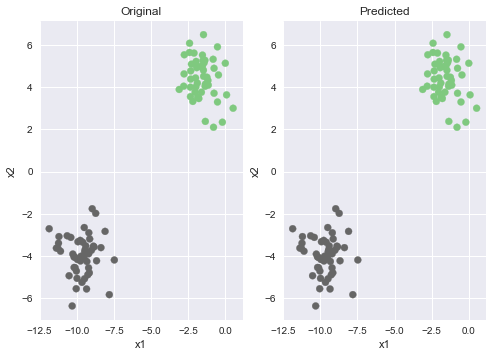

In [347]:
# plot original data
plt.subplot(121)
plot(X[:, 0], X[:, 1], y, 'Original')

# plot predicted value
plt.subplot(122)
plot(X[:, 0], X[:, 1], y_pred, 'Predicted')

### `SVC`

In [348]:
from sklearn.svm import SVC # support vector classifier

classifier = SVC(kernel='linear') # set kernel to `linear`
classifier.fit(X, y)
y_pred2 = classifier.predict(X)

# compare prediction using LinearSVC and SVC, the prediction should be the same
print(np.sum(y_pred == y_pred2) / len(y_pred))

1.0


## Support Vectors & Decision Boundary

In [349]:
# support vectors
print('number of support vectors for each class:', classifier.n_support_)
print('support vectors:\n', classifier.support_vectors_)

number of support vectors for each class: [1 1]
support vectors:
 [[-3.10367371  3.90202401]
 [-8.72395657 -1.9862468 ]]


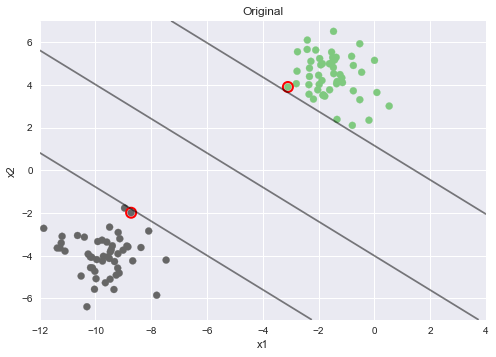

In [350]:
plot(X[:, 0], X[:, 1], y, 'Original')

# plot support vectors
SVs = classifier.support_vectors_
plt.scatter(SVs[:, 0], SVs[:, 1], s=100, color='r', facecolors='none', linewidth=2)

# plot decision boundary and margin
def plot_boundary(xline, yline, classifier, levels=[0], linestyles=['-']):
    YY, XX = np.meshgrid(yline, xline)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    value = classifier.decision_function(xy).reshape(XX.shape)
    plt.contour(xline, yline, value, colors='k',
                levels=levels, alpha=0.5, linestyles=linestyles);

xline = np.linspace(-12, 4, 30)
yline = np.linspace(-7, 7, 30)
plot_boundary(xline, yline, classifier, levels=[-1, 0, .93])

## Kernel SVM: Non-linear Decision Boundary

accuracy (use np.sum): 0.54
accuracy (use .score): 0.54


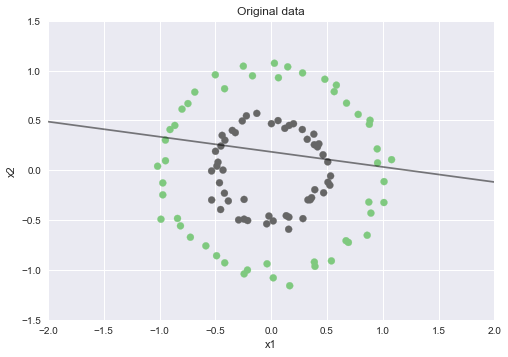

In [355]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.05, factor=.5, random_state=0)

plot(X[:, 0], X[:, 1], y, 'Original data')

# linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)
y_pred = linear_svm.predict(X)

# Evaluate performance
print('accuracy (use np.sum):', np.sum(y == y_pred) / len(y))  # training accuracy (use `np.sum`)
print('accuracy (use .score):', linear_svm.score(X, y))        # training accuracy (use sklearn `.score`)

# plot decision boundary
xline = np.linspace(-2, 2, 30)
yline = np.linspace(-1.5, 1.5, 30)
plot_boundary(xline, yline, linear_svm)

nonlinear SVM accuracy: 1.0


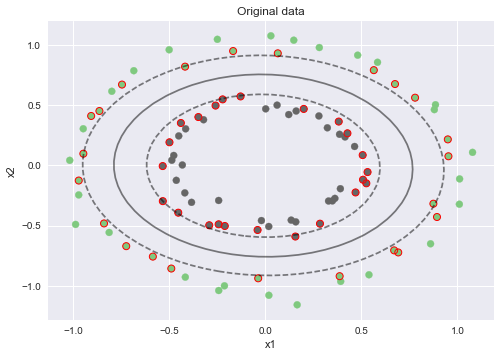

In [370]:
# nonlinear boundary (nonlinear support vector classifier)
nonlinear_svm = SVC(kernel='rbf')
nonlinear_svm.fit(X, y)
print('nonlinear SVM accuracy:', nonlinear_svm.score(X, y))

# plot decision boundary
plot(X[:, 0], X[:, 1], y, 'Original data')
xline = np.linspace(-1, 1, 30)
yline = np.linspace(-1, 1, 30)
plot_boundary(xline, yline, nonlinear_svm, levels=[-.7, 0, .7], linestyles=['--', '-', '--'])

# plot support vectors
SVs = nonlinear_svm.support_vectors_
plt.scatter(SVs[:, 0], SVs[:, 1], color='r', linewidth=1, facecolors='none');

# Part 3: Regression - Least-Square Regression

## Linear Regression

We can fit a straight line to some real-valued data. You are probably very familiar with this simple linear regression model where $a$ is the **slope** and $b$ is the **intercept**.
$$
\hat{y} = ax+b
$$

What least-square regression does is to find this best line, $\hat{y} = ax+b$, which minimizes the sum of squared error (or mean squared error).

> **Least-square: minimize the sum of squared error (SE) or mean squared error (MSE)**

Error means the difference between real answer $y$ and the predicuted value $\hat{y}$. The sum of squared error is the sum of all $(y - \hat{y})^2$ for all the data points.

> Sum of squared error (SE): $\sum^{n}_{i=1} (y - \hat{y})^2$

> Mean squared error (MSE): $\frac{\sum^{n}_{i=1}(y - \hat{y})^2}{N}$

In [ ]:
x = np.random.randint(100, size=100)
y = 5 * x - 3 + np.random.randint(200, size=100)

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

## `LinearRegression` Estimator

To fit a linear regression model, we can use sklearn's `LinearRegression()` Estimator from `sklearn.linear_model` class.

In [ ]:
from sklearn.linear_model import LinearRegression

# transform 1D array into 2D (n_sample, n_features), in this example n_features = 1
x = x.reshape(len(x), 1)

# initialize linear regressin model
linear_reg = LinearRegression()

# fit data
linear_reg.fit(x, y);

y_pred = linear_reg.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, 'r');

You can find the coefficients and intercept of the linear regression model by using `.coef_` and `.intercept_`.

In [ ]:
print('coefficients:', linear_reg.coef_)
print('intercept:', linear_reg.intercept_)

## Muiltidimensional Linear Regression

Now we have a simple linear model, we can expand the same idea into multidimensions, meaning multiple features. Using only one feature is often too simple, we may want to use many features ($x_i$) at the same time. 

$$
\hat{y} = a_0 + a_1 x_1 + a_2 x_2 + ... a_n x_n
$$

In a simple linear regression, we are fitting a line to the data. In a 3 dimensions, we are fitting a plane to the data and in higher dimensions, we are fitting a hyper-plane to the data. It is usually very difficult to visualize a hyper-plane in a high-dimension space but we can still see an example.

In [ ]:
x = np.random.randint(100, size=(100, 3))  # x shape = (100, 3)

# coefficients: [0.5, 3, 1.5], intercept: 5
y = 5 + 0.5 * x[:, 0] + 3 * x[:, 1] + 1.5 * x[:, 2]  # y shape = (100,)

print(x.shape, y.shape)

In [ ]:
# initialize linear regressin model
multi_reg = LinearRegression()

# fit data
multi_reg.fit(x, y);

# coeff & intercept
print('coefficients:', multi_reg.coef_)
print('intercept:', multi_reg.intercept_)

## Polynomial Regression

Sometimes a linear relationship may be too simple. If we want to model a non-linear relationship, one common trick is to transform the data according to a basis function and then train a linear regression on the transformed data. This appproach allows the model to learn a much wider range of patterns (relationships) of data while mainting a generally fast performance of a linear model.

### Polynomial Features

We have our simple linear regression from the previous section.

$$
\hat{y} = a_0 + a_1 x
$$

For example, if we want to fit a parabola to the data instead of a straight line, we can extend our linear regression by combining a second-order polynomials. The model will looks like this, assuming we have one feature $x$ here:

$$
\hat{y} = a_0 + a_1 x + a_2 x^2
$$

We can also combine higher-order polynomials. These are called **polynomial features**.

$$
\hat{y} = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + a_4 x^4
$$

In the example below, we have

$$
\hat{y_1} = 5 x -3 \\
\hat{y_2} = x + x^2 \\
\hat{y_3} = x + x^2 + 0.1 x^3
$$

In [ ]:
# polynomial relationship (degree = 2)
x = np.random.randint(50, size=100) - 25
y1 = 5 * x - 3 
y2 = x + x**2 
y3 = x + x**2 + 0.1 * x**3

plt.scatter(x, y1, label='degree=1')
plt.scatter(x, y2, label='degree=2')
plt.scatter(x, y3, label='degree=3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

We can have multiple features $x_1, x_2, ... x_n$ and combine their second-order polynomials to construct something more complex. For example, if we have 2 features $x_1, x_2$, we can construct a polynomial regression like this:

$$
\hat{y} = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_1x_2 + a_4 x_1^2 + a_5 x_2^2
$$

### Polynomial Regression Is Still A Linear Model

Something surprising here is that a polynomial regression is still a linear model. To observe this, we can create another new variables $z_i$, where

$$
[z_1, z_2, z_3, z_4, z_5] = [x_1, x_2, x_1x_2, x_1^2, x_2^2]
$$

And we can re-write our model as

$$
\hat{y} = a_0 + a_1 z_1 + a_2 z_2 + a_3 z_3 + a_4 z_4 + a_5 z_5
$$

We can see that the resulting model is the same class of the multidimensional linear regression. The model is **linear** in $a_n$. The linearity means that the coefficients $a_n$ never multiply or divide each other.

By incroporating polynomial features, we have the capability to capture non-linear relationship using only a simple linear model.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = np.random.randint(50, size=500) - 25
x2 = np.random.randint(50, size=500) - 25
y = x1 + x2 + x1*x2 + (x1**2) + (x2**2)

ax.scatter(x1, x2, y)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

## `PolynomailFeatures()`

We can construct polynomial features directly by using `PolynomialFeatures()` from `sklearn.preprocessing` class.

> - input: 2D array
> - degree: Integer
    - The degree of the polynomial features. 
    - Default = 2.
> - include_bias:
    - If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).

In [ ]:
# construct polynomial features with degree = 3
from sklearn.preprocessing import PolynomialFeatures

x = np.array([[1, 2, 3, 4, 5]]).T  # 2D array
poly = PolynomialFeatures(degree=3, include_bias=False)
print(poly.fit_transform(x))

In [ ]:
# includ_bias = True
print(PolynomialFeatures(degree=3, include_bias=True).fit_transform(x))

### Pipeline: Automate Machine Learning Workflow

Sklearn provdies a handy class `make_pipeline` from `sklearn.pipeline` that can automate the machine learning workflow. It allows various transformation to be chained together. We can also add an estimator (i.e. a model) at the end. Data will flow from the start of the pipleine to the end, and it will be transformed and fed to the next step.

> We can use the pipeline object in 2 ways:
> 1. `fit` -> `transform`:  if the pipeline ends with a transformer
> 2. `fit` -> `predict`: if the pipeline ends with an estimator

In [ ]:
# generate data
x = np.random.randint(50, size=100) - 25  # 1D array
y =  x + x**2 + 0.1 * x**3 - np.random.randint(300, size=100)

plt.scatter(x, y);

In [ ]:
from sklearn.pipeline import make_pipeline

x = x.reshape(len(x), 1)  # convert x into 2D array, x.shape(100, 1)

# construct a pipeline
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())

# ------- equivalent to --------
# poly = PolynomialFeatures(3)
# x_poly = poly.fit_transform(x)
# poly_reg = LinearRegression()
# -------------------------------

# data will be be transformed into polynomial features and then fed to linear regression model
poly_reg.fit(x, y)
y_pred = poly_reg.predict(x)

plt.scatter(x, y)
plt.scatter(x, y_pred, color='r')
plt.xlabel('x')
plt.ylabel('y');